In [162]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [163]:
def solveLinearRegresion(X, y):
    return np.dot(np.dot(np.linalg.pinv(np.dot(X.transpose(), X)), X.transpose()),y)

def predict(X, b, threshold):
    return np.array(np.dot(X, b) > threshold)

def accuracy(X, y):
    return (sum(X == y) / float(len(y))) * 100

def min_max_norm(X):
    return X / 255
    
def cost(X, y, b):
    return np.sum((np.dot(X,b) - np.array(y))**2)

def GD_LR(X, y, b):
    return -np.dot(X.transpose(), y) + np.dot(np.dot(X.transpose(), X), b)

In [164]:
test_data = pd.read_csv('MNIST_test.csv', skiprows=[0], header=None)
training_data = pd.read_csv('MNIST_training.csv', skiprows=[0], header=None)

In [165]:
y_training = training_data.iloc[:,0]
y_test = test_data.iloc[:,0]

In [166]:
X_training = training_data.iloc[:,1:]
X_test = test_data.iloc[:,1:]

In [167]:
b_opt = solveLinearRegresion(X_training, y_training)
print b_opt

[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

In [168]:
predictions = predict(X_test, b_opt, .5)
print "Accuracy is %f%%" % accuracy(predictions, y_test)

Accuracy is 98.000000%


In [169]:
_, p = X_training.shape
b_est = np.zeros(p)
learning_rate = 1e-10
bs = [b_est]
costs = [cost(X_training, y_training, b_est)]
for i in range(0, 100):
    b_est = b_est - learning_rate * GD_LR(X_training, y_training, b_est)
    b_cost = cost(X_training, y_training, b_est)
    bs.append(b_est)
    costs.append(b_cost)
    

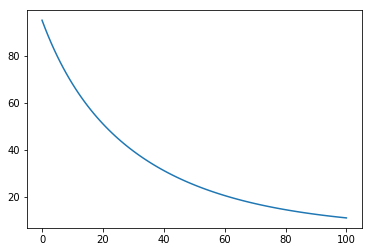

[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

In [170]:
plt.plot(costs)
plt.show()
print b_est

In [171]:
gd_prediction = predict(X_test, b_est, .5)
print "Non-normalized accuracy is %f%%" % accuracy(gd_prediction, y_test)

Non-normalized accuracy is 97.500000%


In [174]:
X_training_norm = min_max_norm(X_training)
X_test_norm = min_max_norm(X_test)
_, p = X_training_norm.shape
b_est = np.zeros(p)
learning_rate = 1e-
bs = [b_est]
costs = [cost(X_training_norm, y_training, b_est)]
for i in range(0, 100):
    b_est = b_est - learning_rate * GD_LR(X_training_norm, y_training, b_est)
    b_cost = cost(X_training_norm, y_training, b_est)
    bs.append(b_est)
    costs.append(b_cost)

In [175]:
gd_prediction = predict(X_test_norm, b_est, .5)
print "Normalized accuracy is %f%%" % accuracy(gd_prediction, y_test)

Normalized accuracy is 99.500000%
